In [1]:
from mcmc import initialize_slab, spin_flip, mcmc_run, get_random_idx
from catkit.gen.adsorption import get_adsorption_sites

import numpy as np

In [2]:
# Cu alat from https://www.copper.org/resources/properties/atomic_properties.html
Cu_alat = 3.6147
slab = initialize_slab(Cu_alat)

# get ALL the adsorption sites
# top should have connectivity 1, bridge should be 2 and hollow more like 4
coords, connectivity, sym_idx = get_adsorption_sites(slab, symmetry_reduced=False)
print(f"In pristine slab, there are a total of {len(connectivity)} sites")

# state of each vacancy in slab. for state > 0, it's filled, and that's the index of the adsorbate atom in slab 
state = np.zeros(len(coords), dtype=int)

temp = 300
pot = 2

In pristine slab, there are a total of 64 sites


/Users/xiaochendu/miniconda3/envs/mlenv/lib/python3.9/site-packages/catkit/gen/adsorption.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r1_topology = np.array(self.r1_topology)
/Users/xiaochendu/miniconda3/envs/mlenv/lib/python3.9/site-packages/catkit/gen/adsorption.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r2_topology = np.array(self.r2_topology)


In [3]:
# test top
top_site = get_random_idx(connectivity, type="top")
bridge_site = get_random_idx(connectivity, type="bridge")
hollow_site = get_random_idx(connectivity, type="hollow")

# add to 3 sites
spin_flip(state, slab, temp, pot, coords, connectivity, save_cif=True, iter=1, site_idx=top_site, testing=True, folder_name="different_sites_noalat")
spin_flip(state, slab, temp, pot, coords, connectivity, save_cif=True, iter=2, site_idx=bridge_site, testing=True, folder_name="different_sites_noalat")
spin_flip(state, slab, temp, pot, coords, connectivity, save_cif=True, iter=3, site_idx=hollow_site, testing=True, folder_name="different_sites_noalat")


 we are at iter 1
idx is 9 with connectivity 1 at [ 2.55597888  5.11195776 20.42205   ]
before proposed state is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
site is not filled, attempting to adsorb
current slab has 64 atoms
proposed slab has 65 atoms
after proposed state is
[ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

 we are at iter 2
idx is 40 with connectivity 2 at [ 7.66793665  6.3899472  20.42205   ]
before proposed state is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
site is not filled, attempting to adsorb
current slab has 64 atoms
proposed slab has 65 atoms
after proposed state is
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 64,  0,  0,  0,  0,  0,  0,  0,  0]),
 Gratoms(symbols='Cu65', pbc=[True, True, False], cell=[10.223915527820054, 10.223915527820054, 35.42204999999999], initial_magmoms=..., surface_atoms=..., tags=...),
 0,
 False)

In [4]:
# perform 5 test iterations
site1 = len(state)-1
site2 = len(state)-2
site3 = len(state)-3

# add to 3 sites
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, save_cif=True, iter=1, site_idx=site1, testing=True, folder_name="different_sites_noalat")
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, prev_energy=energy, save_cif=True, iter=2, site_idx=site2, testing=True, folder_name="different_sites_noalat")
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, prev_energy=energy, save_cif=True, iter=3, site_idx=site3, testing=True, folder_name="different_sites_noalat")

# remove from 2nd site
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, prev_energy=energy, save_cif=True, iter=4, site_idx=site2, testing=True, folder_name="different_sites_noalat")
# remove from 1st site
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, prev_energy=energy, save_cif=True, iter=5, site_idx=site1, testing=True, folder_name="different_sites_noalat")

# add to 1st site again
state, slab, energy, _ = spin_flip(state, slab, temp, pot, coords, connectivity, prev_energy=energy, save_cif=True, iter=6, site_idx=site1, testing=True, folder_name="different_sites_noalat")


 we are at iter 1
idx is 63 with connectivity 4 at [ 1.27798944  8.94592609 20.42205   ]
before proposed state is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
site is not filled, attempting to adsorb
current slab has 64 atoms
proposed slab has 65 atoms
after proposed state is
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]

 we are at iter 2
idx is 62 with connectivity 4 at [ 3.83396832  8.94592609 20.42205   ]
before proposed state is
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
site is not filled, attempting to adsorb
current slab has 65 atoms
proposed slab has 66 atoms
after proposed state is
[ 0  0  0  

In [5]:
from time import perf_counter

start = perf_counter()
# chem pot 0 to less complicate things
# temp in terms of kbT
# no cooling
# 20 runs
history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=1, temp=1, pot=0, alpha=1, slab=None)
stop = perf_counter()
print(f"Time taken = {stop - start} seconds")

initializing slab
In pristine slab, there are a total of 64 sites
0.05517572599999454 0.05587562399999513 0.05608174500000018 0.056275129999995954
running for 64 iterations per run over a total of 1 runs

 we are at iter 1
idx is 6 with connectivity 1 at [ 5.11195776  2.55597888 20.42205   ]
before proposed state is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
site is not filled, attempting to adsorb
current slab has 64 atoms
proposed slab has 65 atoms
after proposed state is
[ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
0.05275518199999851 0.05301904800000301 0.0532247539999986 0.053518167000000005
prev energy is -210.23276418379697
curr energy is -211.64331312287635
energy diff is -1.4105489390793764
potential is 0
delta_N 1
k_b T 1
base probability is

In [1]:
from time import perf_counter

# chem_pots = np.linspace(0.0, 2.0, 5)
chem_pots = [0] # do just one
num_runs = 20
all_energy_hist = np.random.rand(len(chem_pots), num_runs)
all_frac_accept_hist = np.random.rand(len(chem_pots), num_runs)
all_top_count_hist = np.random.rand(len(chem_pots), num_runs)
all_bridge_count_hist = np.random.rand(len(chem_pots), num_runs)
all_hollow_count_hist = np.random.rand(len(chem_pots), num_runs)

for i, chem_pot in enumerate(chem_pots):
    start = perf_counter()
    # chem pot 0 to less complicate things
    # temp in terms of kbT
    # 0.9 alpha for 20 runs
    history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=num_runs, temp=1, pot=chem_pot, alpha=0.9, slab=None)
    stop = perf_counter()
    print(f"Time taken = {stop - start} seconds")
    all_energy_hist[i] = energy_hist
    all_frac_accept_hist[i] = frac_accept_hist
    all_top_count_hist[i] = adsorption_count_hist[1]
    all_bridge_count_hist[i] = adsorption_count_hist[2]
    all_hollow_count_hist[i] = adsorption_count_hist[4]

NameError: name 'np' is not defined

/var/folders/85/zd91wmvn09956_q0gy77y3080000gp/T/ipykernel_30199/3532796910.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


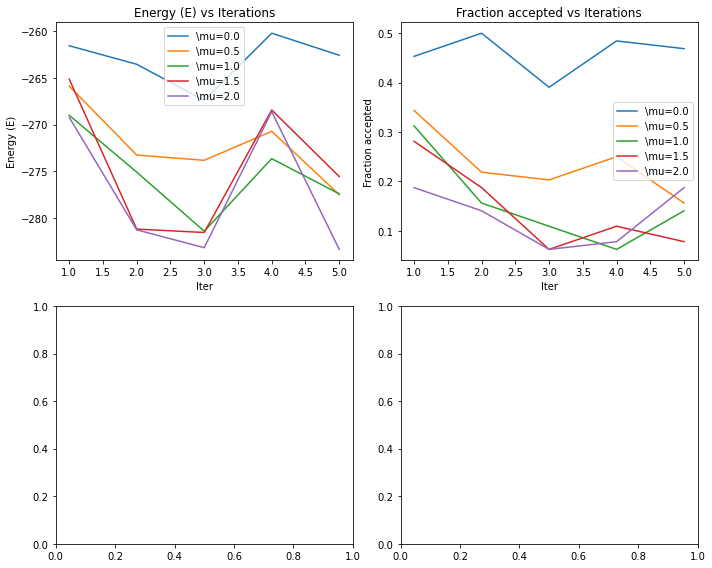

In [12]:
import matplotlib.pyplot as plt
# do the plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
runs = np.arange(1, num_runs+1)
legends = [f"\mu={mu}" for mu in chem_pots]
ax[0, 0].plot(runs, all_energy_hist)
ax[0, 0].set_xlabel("Iter")
ax[0, 0].set_ylabel("Energy (E)")
ax[0, 0].set_title("Energy (E) vs Iterations")
ax[0, 0].legend(legends)


ax[0, 1].plot(runs, all_frac_accept_hist)
ax[0, 1].set_xlabel("Iter")
ax[0, 1].set_ylabel("Fraction accepted")
ax[0, 1].set_title("Fraction accepted vs Iterations")
ax[0, 1].legend(legends)


# ax[1, 1].plot(runs, np.array(list(adsorption_count_hist.values())).T)
# ax[1, 1].set_xlabel("Iter")
# ax[1, 1].set_ylabel("Adsorption count")
# ax[1, 1].legend(adsorption_count_hist.keys())
# ax[1, 1].set_title("Adsorption count vs Iterations")

fig.show()
fig.tight_layout()
# fig.savefig("energy_per_spin")
# fig.savefig("energy_per_spin_10x10")